<a href="https://colab.research.google.com/github/manan-maini26/Medical-Insurance_Cost_Prediction/blob/main/market_dynamics_through_K_means_clustering_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the dependencies


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

data collection and analysis

In [ ]:
# loading the csv dataset into the pandas dataframe
customer_data = pd.read_csv('/content/Mall_Customers.csv')


In [ ]:
# first 5 rows of the data
customer_data.head()
#if the spending score 70<100 means person spending good amount of money in that mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# finding the number of rows and colums
customer_data.shape

(200, 5)

In [ ]:
# basics info for better understanding
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# checking for the missing value
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
# chosing Annual Income and Spending Score

In [ ]:
X = customer_data.iloc[:, [3,4]].values
X

chossing the number of cluster

### WCSS - within cluster sum of square - helps us to find the k value

In [ ]:
# finding wcss value for differnt number of cluster

wcss = []


for i in range(1,11):
  kmeans = KMeans(n_clusters=i , init='k-means++' , random_state =42)
  kmeans.fit(X)


  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

AttributeError: ignored

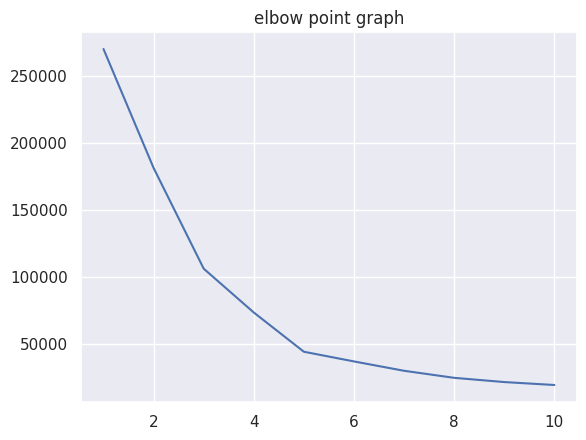

In [ ]:
#ploting the elbow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("elbow point graph")
plt.xlable("number of cluster")
plt.ylabel("wcss")
plt.show()

the optimum number of cluster would be 5


training the K means clustering model
K = 5

In [ ]:
kmeans = KMeans(n_clusters = 5 , init='k-means++', random_state = 0)

#return a label of each data point based on there cluster
Y = kmeans.fit_predict(X)
Y


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

visualizing the cluster

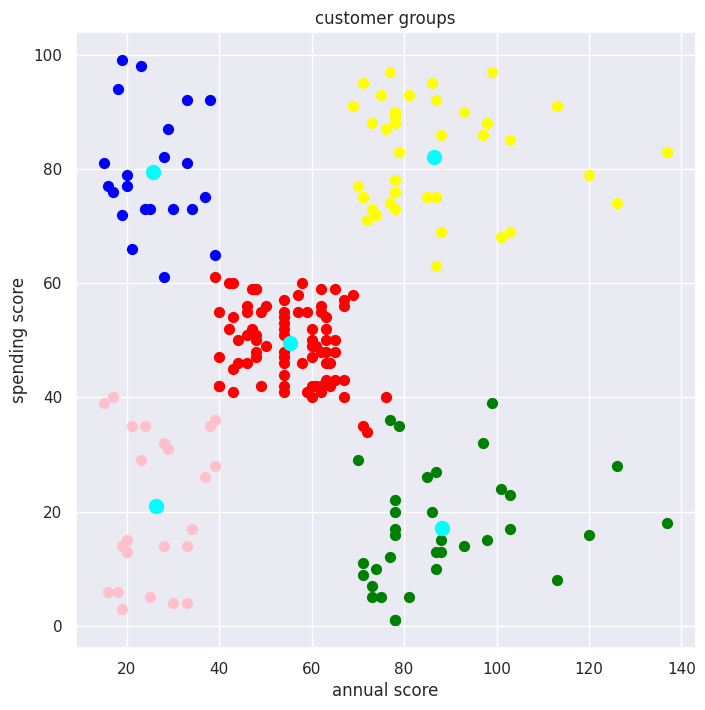

In [ ]:
# ploting the cluster with there cnetriod
plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0],X[Y==0,1],s = 50 , c= "green" , label= "cluster 1")
plt.scatter(X[Y==1,0],X[Y==1,1],s = 50 , c= "red" , label= "cluster 2")
plt.scatter(X[Y==2,0],X[Y==2,1],s = 50 , c= "yellow" , label= "cluster 3")
plt.scatter(X[Y==3,0],X[Y==3,1],s = 50 , c= "blue" , label= "cluster 4")
plt.scatter(X[Y==4,0],X[Y==4,1],s = 50 , c= "pink" , label= "cluster 5")

# plot the centriod
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='cyan',label='centriods')

plt.title('customer groups')
plt.xlabel('annual score')
plt.ylabel('spending score')
plt.show()